In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identified nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


### Performed API Calls
* Performed a weather check on each city using a series of successive API calls.
* Included a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url='http://api.openweathermap.org/data/2.5/weather?q='
#{city name},{country code}&APPID={key}

cities_data=[]
cloudiness_data=[]
temperatur_data=[]
humidity_data=[]
windspeed_data=[]
lat_data=[]
lng_data=[]
country_data=[]
date_data=[]

print('BEGINING DATA RETREIVAL')
print('------------------------')
for x in cities:
    response=requests.get(f'{base_url}{x}&APPID={api_key}').json()
    
    try:
        cloudiness=response['clouds']['all']
        temperature=response['main']['temp']
        humidity=response['main']['humidity']
        wind_speed=response['wind']['speed']
        lat=response['coord']['lat']
        lng=response['coord']['lon']
        country=response['sys']['country']
        date=response['dt']
        
        cloudiness_data.append(cloudiness)
        temperatur_data.append(temperature)
        humidity_data.append(humidity)
        windspeed_data.append(wind_speed)
        cities_data.append(x)
        lat_data.append(lat)
        lng_data.append(lng)
        country_data.append(country)
        date_data.append(date)
    except:
        print('Not Found') 
              

print('-----------------------')
print('DATA RETRIVAL COMPLETE')
print('-----------------------')

BEGINING DATA RETREIVAL
------------------------
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
-----------------------
DATA RETRIVAL COMPLETE
-----------------------


In [4]:
#created DataFrame of relevant information
data_frame=pd.DataFrame(cities_data)
data_frame=data_frame.set_index(0)
data_frame['Temperature']=temperatur_data
data_frame['Humidity']=humidity_data
data_frame['Wind Speed']=windspeed_data
data_frame['Cloudiness']=cloudiness_data
data_frame['Latitude']=lat_data
data_frame['Longitude']=lng_data
data_frame['Country']=country_data
data_frame['Date']=date_data
data_frame=data_frame.reset_index()
data_frame=data_frame.rename(columns={0:'Cities'})
data_frame.head()

,Cities,Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,Country,Date
0,georgetown,302.610,70,2.10,40,6.80,-58.16,GY,1564170826
1,san patricio,283.859,82,1.83,100,-26.98,-56.83,PY,1564171101
2,qaanaaq,282.959,39,2.20,55,77.48,-69.36,GL,1564171102
3,tiznit,293.359,86,5.15,0,29.70,-9.73,MA,1564171102
4,chuy,285.559,85,5.99,95,-33.69,-53.46,UY,1564171102


In [5]:
# analyzed date to see if cleaning necessary
data_frame.count()

Cities         551
Temperature    551
Humidity       551
Wind Speed     551
Cloudiness     551
Latitude       551
Longitude      551
Country        551
Date           551
dtype: int64

In [6]:
#exported to CSV file
data_frame.to_csv('weatherpy_hw.csv')

Text(0, 0.5, 'Temperature (C)')

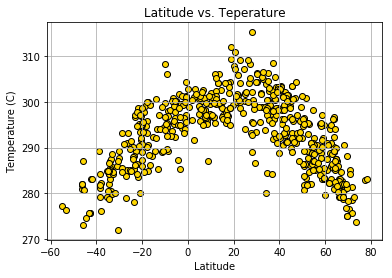

In [7]:
#ploted lat vs temp
plt.scatter(data_frame['Latitude'],data_frame['Temperature'],marker='o',color='gold',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Teperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

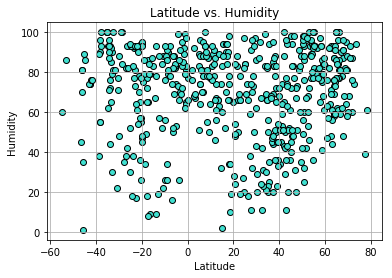

In [8]:
plt.scatter(data_frame['Latitude'],data_frame['Humidity'],marker='o',color='turquoise',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

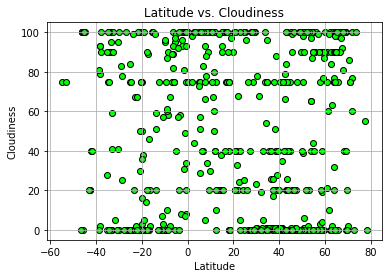

In [9]:
plt.scatter(data_frame['Latitude'],data_frame['Cloudiness'],marker='o',color='lime',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

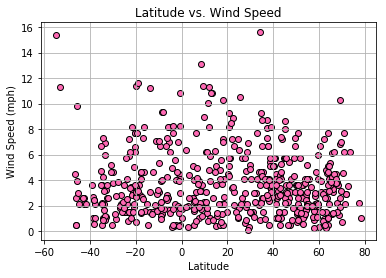

In [10]:
plt.scatter(data_frame['Latitude'],data_frame['Wind Speed'],marker='o',color='hotpink',edgecolors='black')
plt.grid()
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')